In [1]:
import torch
import numpy as np
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader
from image_dataset import ImageDataset, files_name
from segmentation_model import SegmentationModel
from Unet_pp_v2 import Unet_pp
from DataAugmentation import DataAugmentation
import sklearn
#from Unet_v2 import *
from unet_model import UNet

import matplotlib.pyplot as plt

# Load image
data = []

for name in range(69,70):
    im_seg = np.load("../../../../Desktop/clean_data/"+str(name)+".npy")
    im = np.transpose(im_seg[:3], (1,2,0))
    seg = im_seg[3]

    data.append([im, seg])


(256, 256, 3)
(256, 256)


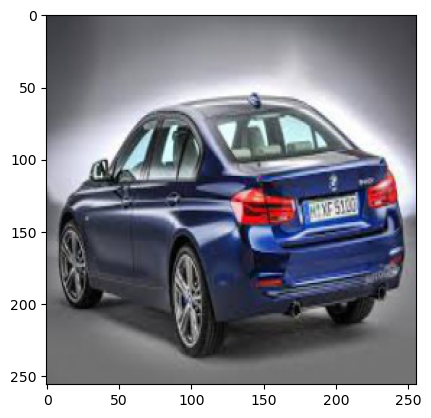

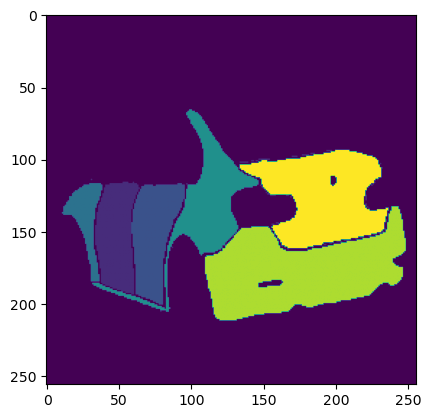

torch.Size([3, 256, 256])
243
torch.Size([3, 256, 256])
torch.Size([1, 256, 256])
torch.Size([3, 256, 256])
torch.Size([1, 256, 256])


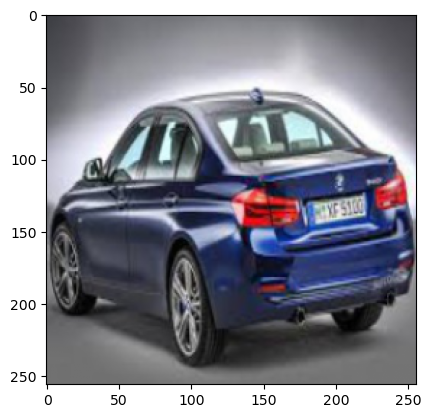

torch.Size([256, 256])


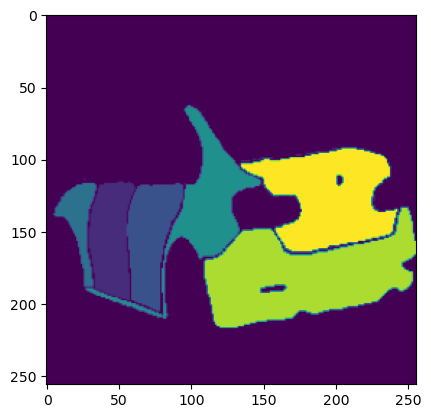

In [59]:
import random
from torchvision import transforms 
min_crop_sz = 200

# Load image
data = []

for name in range(69,70):
    im_seg = np.load("../../../../Desktop/clean_data/"+str(name)+".npy")
    im = np.transpose(im_seg[:3], (1,2,0))
    seg = im_seg[3]

    data.append([im, seg])

    print(im.shape)
    print(seg.shape)

    plt.figure()
    plt.imshow(im)
    plt.show()

    plt.figure()
    plt.imshow(seg)
    plt.show()

im = torch.from_numpy(np.transpose(data[0][0], (2,0,1)))
seg = torch.from_numpy(data[0][1])
print(im.size())
seg = torch.reshape(seg, (1,256, 256))


crop_sz = int(random.uniform(a=min_crop_sz, b=im.shape[1]))
print(crop_sz)
print(im.shape)
print(seg.shape)
#cropper = transforms.RandomResizedCrop(size=im.shape[1])
trans_im = transforms.CenterCrop(size=crop_sz)(im)
trans_im = transforms.Resize(size=im.shape[1])(trans_im)
trans_seg = transforms.CenterCrop(size=crop_sz)(seg)
trans_seg = transforms.Resize(size=im.shape[1])(trans_seg)

print(trans_im.shape)
print(trans_seg.shape)


plt.figure()
plt.imshow(np.transpose(trans_im.numpy(),(1,2,0)))
plt.show()

plt.figure()
plt.imshow(np.transpose(trans_seg.numpy(), (1,2,0)))


trans_seg = torch.squeeze(trans_seg)

print(trans_seg.shape)

(256, 256, 3)
(256, 256)


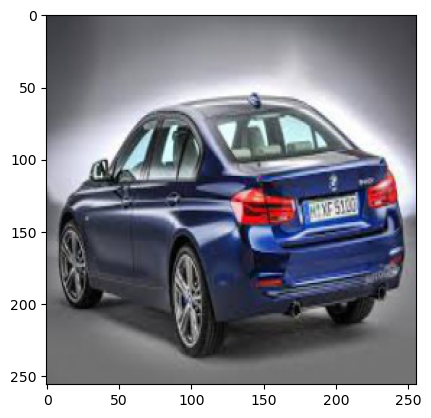

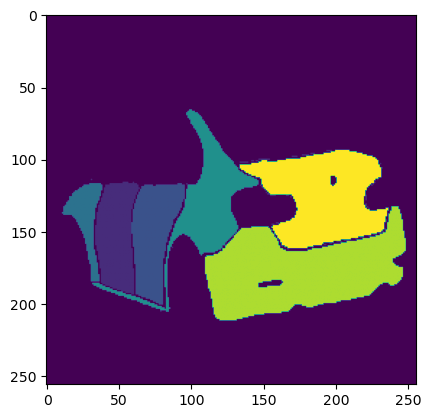

torch.Size([3, 256, 256])
torch.Size([3, 256, 256])
torch.Size([256, 256])


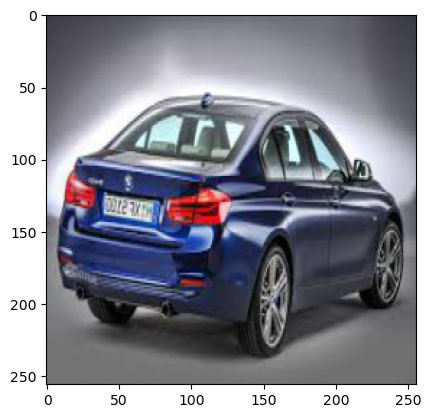

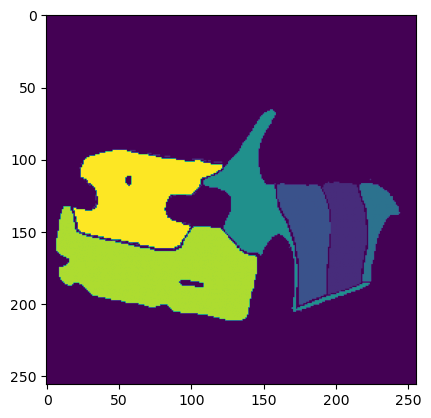

In [43]:
import torchvision.transforms.functional as TF
# Load image
data = []

for name in range(69,70):
    im_seg = np.load("../../../../Desktop/clean_data/"+str(name)+".npy")
    im = np.transpose(im_seg[:3], (1,2,0))
    seg = im_seg[3]

    data.append([im, seg])

    print(im.shape)
    print(seg.shape)

    plt.figure()
    plt.imshow(im)
    plt.show()

    plt.figure()
    plt.imshow(seg)
    plt.show()


im = torch.from_numpy(np.transpose(data[0][0], (2,0,1)))
seg = torch.from_numpy(data[0][1])
print(im.size())

trans_im = TF.hflip(im)
trans_seg = TF.hflip(seg)


plt.figure()
plt.imshow(np.transpose(trans_im.numpy(),(1,2,0)))
plt.show()

plt.figure()
plt.imshow(trans_seg.numpy())
plt.show()


<built-in method size of Tensor object at 0x7fe1fb9cb6d0>
<built-in method size of Tensor object at 0x7fe1fb407450>


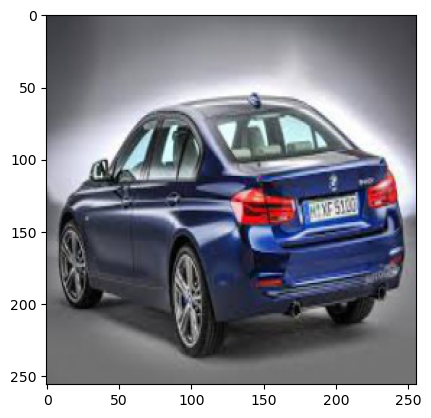

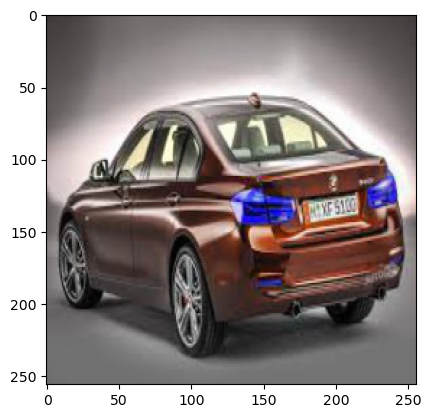

In [2]:
data = DataAugmentation(data, pflip=1, pcrop=1, min_crop_sz=200, prot=1, max_rot_ang=30)

for i in range(len(data)):
    plt.figure()
    plt.imshow(data[i][0])
    plt.show()